# Fokas Lennelles Equation

$$u_{xt} - u  + 2 i|u|^2u_x=0$$

$x \quad ϵ \quad  [-1,1]$

$t \quad ϵ \quad  [0,1]$ 

$$(r +im)_{xt} - (r+im)  + 2 i(r^2 + m^2)(r+im)_x=0$$
**1. Real part** 
$$r_{xt} - r  -2 (r^2 + m^2)m_x=0$$
2. **Imaginary part** 
$$m_{xt} - m  +2 (r^2 + m^2)r_x=0$$ 

**Solution**

$$U=\frac{-2a}{a + i b}\frac{e^{\theta + i Χ}}{ e^{2\theta }- b - ia}$$ 
$$U=\frac{2a}{a + i b}\frac{e^{\theta + i Χ}}{b - e^{2\theta } + ia}$$ 

$$U=\frac{2a}{a + i b}\frac{e^{\theta + i Χ} (b - e^{2\theta } - ia)}{(b - e^{2\theta } + ia)(b - e^{2\theta } - ia)}$$

$$U=\frac{2a(a - ib)}{(a + i b)(a-ib)}\frac{e^{\theta + i Χ} (b - e^{2\theta } - ia)}{(b - e^{2\theta } + ia)(b - e^{2\theta } - ia)}$$

$$U=\frac{2a(a - ib)}{(a^2 + b^2)}\frac{e^{\theta + i Χ} (b - e^{2\theta } - ia)}{(b - e^{2\theta } + ia)(b - e^{2\theta } - ia)}$$

$$U=\frac{2a(a - ib)}{(a^2 + b^2)}\frac{e^{\theta + i Χ} (b - e^{2\theta } - ia)}{((b - e^{2\theta })^2 + a^2)}$$

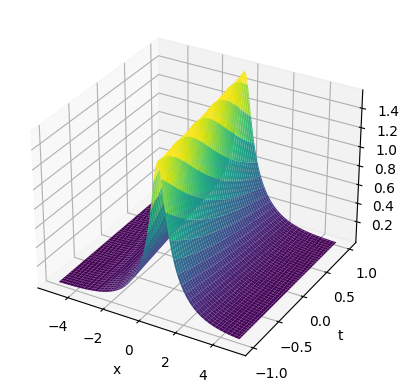

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


N =100
x_min = -5
x_max = 5
t_min = -1
t_max = 1
x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)
XX, TT = np.meshgrid(x_space, t_space)

a=1
b=1
v = 1/(a**2 + b**2)
theta1 = a*(XX + v*TT)
chi1 = b*(XX - v*TT)

r = 2*a*np.exp(theta1)/( (a**2 + b**2)*( ( b-np.exp(2*theta1) )**2 + a**2)  ) *\
         (-a*np.exp(2*theta1)*np.cos(chi1) + (a**2 + b**2)*np.sin(chi1)- b*np.exp(2*theta1)*np.sin(chi1))


m = 2*a*np.exp(theta1)/( (a**2 + b**2)*( ( b-np.exp(2*theta1) )**2 + a**2)  ) *\
         (b*np.exp(2*theta1)*np.cos(chi1) - (a**2 + b**2)*np.cos(chi1)- a*np.exp(2*theta1)*np.sin(chi1))

UU = np.sqrt(r**2 + m**2)

#fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, UU, cmap="viridis")
plt.xlabel("x")
plt.ylabel("t")
plt.show()

PINN to solve PDE

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
torch.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


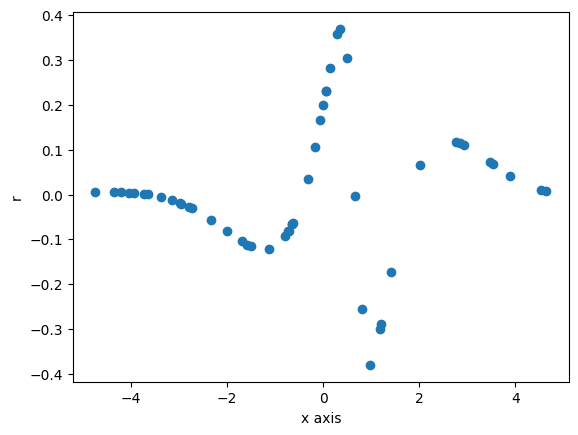

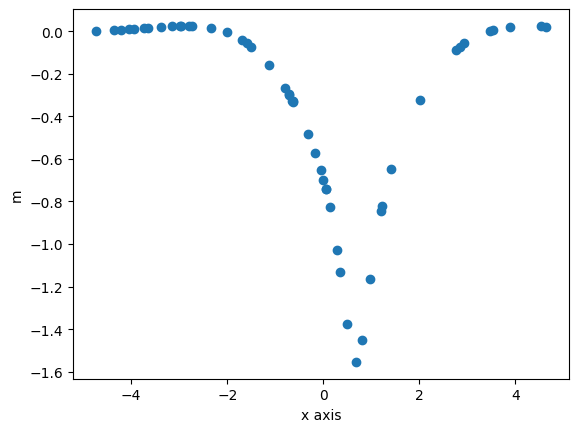

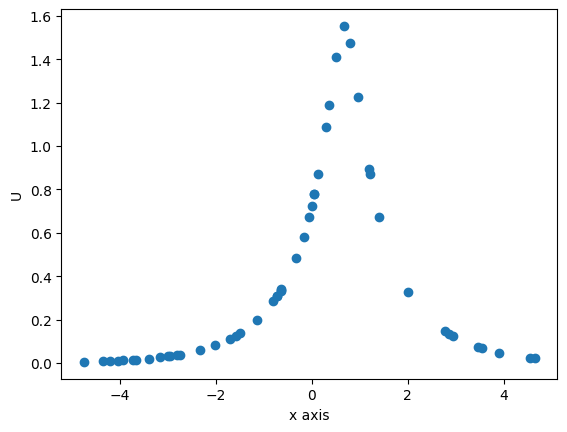

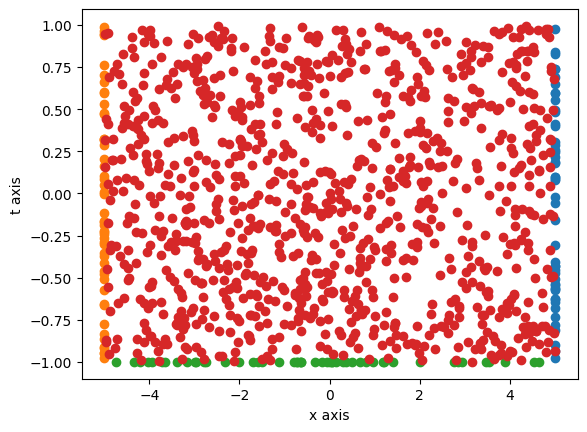

In [ ]:


N_0 = 50
N_b = 50
N_r = 1000
np.random.seed(2)

#initial at U(x, t=0)
x_0 = np.random.uniform(low=x_min, high=x_max, size=(N_0, 1))
t_0 = np.ones((N_0, 1), dtype=np.float64)*t_min


# real initial at t=t_min

theta = a*(x_0 + v*t_min)
chi = b*(x_0 - v*t_min)


r_0 = 2*a*np.exp(theta)/( (a**2 + b**2)*( ( b-np.exp(2*theta) )**2 + a**2)  ) *\
         (-a*np.exp(2*theta)*np.cos(chi) + (a**2 + b**2)*np.sin(chi)- b*np.exp(2*theta)*np.sin(chi))

m_0 = 2*a*np.exp(theta)/( (a**2 + b**2)*( ( b-np.exp(2*theta) )**2 + a**2)  ) *\
         (b*np.exp(2*theta)*np.cos(chi) - (a**2 + b**2)*np.cos(chi)- a*np.exp(2*theta)*np.sin(chi))


t_b1 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b1 = np.ones((N_b, 1), dtype=np.float64)*x_min
#Dirichlet BC
U_b1 = np.ones((N_b, 1), dtype=np.float64)*0

t_b2 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b2 = np.ones((N_b, 1), dtype=np.float64)*x_max
#Dirichlet BC
U_b2 = np.ones((N_b, 1), dtype=np.float64)*0


# uniform distribution
x_c = np.random.uniform(low=x_min, high=x_max, size=(N_r, 1))
t_c = np.random.uniform(low=t_min, high=t_max, size=(N_r, 1))


# traingular distribution 
#x_c = np.random.triangular(x_min, 1, x_max, size=(N_r, 1))
#t_c = np.random.triangular(t_min, 0, t_max, size=(N_r, 1))


plt.scatter(x_0, r_0)
plt.xlabel("x axis")
plt.ylabel("r")
plt.show()

plt.scatter(x_0, m_0)
plt.xlabel("x axis")
plt.ylabel("m")
plt.show()

plt.scatter(x_0, np.sqrt(m_0**2 + r_0**2))
plt.xlabel("x axis")
plt.ylabel("U")
plt.show()

plt.scatter(x_b2, t_b2)
plt.scatter(x_b1, t_b1)
plt.scatter(x_0, t_0)
plt.scatter(x_c, t_c)
plt.xlabel("x axis")
plt.ylabel("t axis")
plt.show()

#Neural Network

## We consider Neural Network as our solution u(x,t)

In [ ]:


class Neural_network(nn.Module):
  def __init__(self):
    super(Neural_network, self).__init__()
    self.input_layer = nn.Linear(2,40)

    self.dropout = nn.Dropout(0.2)
    self.hidden_layer1 = nn.Linear(40,40)
    self.hidden_layer2 = nn.Linear(40,40)
    self.hidden_layer3 = nn.Linear(40,40)
    self.hidden_layer4 = nn.Linear(40,40)
    self.hidden_layer5 = nn.Linear(40,40)
    self.hidden_layer6 = nn.Linear(40,40)
    self.hidden_layer7 = nn.Linear(40,40)
    self.hidden_layer8 = nn.Linear(40,40)
    self.output_layer = nn.Linear(40,2)

  def forward(self, x):

    CELU = torch.nn.CELU()
    hardswish = torch.nn.Hardswish()
    softsign = torch.nn.Softsign()

    #
    
    x = self.input_layer(x)
    x = torch.tanh(x)
    #x = self.dropout(x)
    x = torch.tanh(self.hidden_layer1(x))
    x = torch.tanh(self.hidden_layer2(x))

    
    x = torch.tanh(self.hidden_layer3(x))
    x = torch.tanh(self.hidden_layer4(x))
    x = torch.tanh(self.hidden_layer5(x))
    x = torch.tanh(self.hidden_layer6(x))
    x = torch.tanh(self.hidden_layer7(x))
    #x = self.dropout(x)
    x = torch.tanh(self.hidden_layer8(x))
    x = self.output_layer(x)
    return x

In [ ]:
Net = Neural_network()
Net = Net.to(device)
loss_fu = nn.MSELoss()
optim = torch.optim.Adam(Net.parameters(), lr=0.001)

In [ ]:
#initail
x_01 = torch.autograd.Variable( torch.from_numpy(x_0).float(), requires_grad=False).to(device)
t_01 = torch.autograd.Variable( torch.from_numpy(t_0).float(), requires_grad=False).to(device)
R_01 = torch.autograd.Variable( torch.from_numpy(r_0).float(), requires_grad=False).to(device)
M_01 = torch.autograd.Variable( torch.from_numpy(m_0).float(), requires_grad=False).to(device)
X_0 = torch.cat([x_01, t_01], axis=1)

#BC1
x_b11 = torch.autograd.Variable( torch.from_numpy(x_b1).float(), requires_grad=True).to(device)
t_b11 = torch.autograd.Variable( torch.from_numpy(t_b1).float(), requires_grad=False).to(device)
U_b11 = torch.autograd.Variable( torch.from_numpy(U_b1).float(), requires_grad=False).to(device)
X_b1 = torch.cat([x_b11, t_b11], axis=1)

#BC2
x_b21 = torch.autograd.Variable( torch.from_numpy(x_b2).float(), requires_grad=True).to(device)
t_b21 = torch.autograd.Variable( torch.from_numpy(t_b2).float(), requires_grad=False).to(device)
U_b21 = torch.autograd.Variable( torch.from_numpy(U_b2).float(), requires_grad=False).to(device)
X_b2 = torch.cat([x_b21, t_b21], axis=1)



# PDE Loss

In [ ]:
def pde(x, t, Net):
  x_1 = torch.autograd.Variable( torch.from_numpy(x).float(), requires_grad=True).to(device)
  t_1 = torch.autograd.Variable( torch.from_numpy(t).float(), requires_grad=True).to(device)
  X = torch.cat([x_1, t_1], axis=1)
  
  rr = Net.forward(X)[:, 0:1]
  mm = Net.forward(X)[:, 1:2]

  r_x = torch.autograd.grad(rr.sum(), x_1, create_graph=True)[0]
  r_xx = torch.autograd.grad(r_x.sum(), x_1, create_graph=True)[0]
  r_xxx = torch.autograd.grad(r_xx.sum(), x_1, create_graph=True)[0]
  r_t = torch.autograd.grad(rr.sum(), t_1, create_graph=True)[0]
  r_xt = torch.autograd.grad(r_t.sum(), x_1, create_graph=True)[0]

  m_x = torch.autograd.grad(mm.sum(), x_1, create_graph=True)[0]
  m_xx = torch.autograd.grad(m_x.sum(), x_1, create_graph=True)[0]
  m_xxx = torch.autograd.grad(m_xx.sum(), x_1, create_graph=True)[0]
  m_t = torch.autograd.grad(mm.sum(), t_1, create_graph=True)[0]
  m_xt = torch.autograd.grad(m_t.sum(), x_1, create_graph=True)[0]


  pde1 = r_xt - rr - 2*(rr**2 + mm**2)*m_x
  pde2 = m_xt - mm  + 2*(rr**2 + mm**2)*r_x


  #H1 = integrate (r_x**2 + m_x**2) dx

  def integral_approximation(f, aa):
    return (aa.max() - aa.min() )*torch.mean(f)


  # H1
  H = (r_x**2 + m_x**2)
  H1 = integral_approximation(H, x_1 )
  H1_t = torch.autograd.grad(H1.sum(), t_1, create_graph=True)[0]

  #H3
  H3_real = (r_x**2 + m_x**2)**2 - r_xx*m_x + r_x*m_xx
  H3_imag = -(r_x*r_xx + m_x*m_xx)

  H3_real_integrate = integral_approximation(H3_real, x_1 )
  H3_imag_integrate = integral_approximation(H3_imag, x_1 )

  H3r_t = torch.autograd.grad(H3_real_integrate.sum() , t_1, create_graph=True)[0]
  H3m_t = torch.autograd.grad(H3_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H5
  H5_real = -(r_x*r_xxx + m_x*m_xxx) + 2*(r_x**2 + m_x**2)**3 + 3*(r_x**2 + m_x**2)*(r_x*m_xx -r_xx*m_x)
  H5_imag = -(-r_xxx*m_x + r_x*m_xxx) - 3*(r_x**2 + m_x**2)*(r_x*r_xx + m_x*m_xx)
  
  H5_real_integrate = integral_approximation(H5_real, x_1 )
  H5_imag_integrate = integral_approximation(H5_imag, x_1 )

  H5r_t = torch.autograd.grad(H5_real_integrate.sum() , t_1, create_graph=True)[0]
  H5m_t = torch.autograd.grad(H5_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H-1
  H11_real = -rr*m_x + r_x*mm
  H11_imag = -r_x*rr - mm*m_x

  H11_real_integrate = integral_approximation(H11_real, x_1 )
  H11_imag_integrate = integral_approximation(H11_imag, x_1 )

  H11r_t = torch.autograd.grad(H11_real_integrate.sum() , t_1, create_graph=True)[0]
  H11m_t = torch.autograd.grad(H11_imag_integrate.sum(), t_1, create_graph=True)[0]

  #H-3
  H33_real = -(rr**2 + mm**2) - (rr**2+mm**2)*(rr*m_x - r_x*mm)
  H33_imag = -(rr**2 + mm**2)*(rr*r_x + mm*m_x)

  H33_real_integrate = integral_approximation(H33_real, x_1 )
  H33_imag_integrate = integral_approximation(H33_imag, x_1 )

  H33r_t = torch.autograd.grad(H33_real_integrate.sum() , t_1, create_graph=True)[0]
  H33m_t = torch.autograd.grad(H33_imag_integrate.sum(), t_1, create_graph=True)[0]





  return pde1, pde2, H1_t, H3r_t, H3m_t, H5r_t, H5m_t, H11r_t, H11m_t, H33r_t, H33m_t

#Loss 

In [ ]:
import time

number_of_epoch =30000

loss_value = []
loss_value1 = []
loss_value2 = []
loss_value3 = []

start_time = time.time()


for epoch in range(number_of_epoch):
  optim.zero_grad()       # make the gradient zero
  
  r_pred_0, m_pred_0  = Net.forward(X_0)[:, 0:1], Net.forward(X_0)[:, 1:2]      #forward pass
  Loss_initial = loss_fu(r_pred_0, R_01 ) + loss_fu(m_pred_0, M_01 )    # loss of initial

  r_pred_b1, m_pred_b1 = Net.forward(X_b1)[:, 0:1], Net.forward(X_b1)[:, 1:2]
  Loss_b1 = loss_fu(r_pred_b1, U_b11) + loss_fu(m_pred_b1, U_b11)             # left boudary loss

  r_pred_b2, m_pred_b2 = Net.forward(X_b2)[:, 0:1], Net.forward(X_b2)[:, 1:2]
  Loss_b2 = loss_fu(r_pred_b2, U_b21) + loss_fu(m_pred_b2, U_b21)            #right boundary loss

  r_pred_b1_x = torch.autograd.grad(r_pred_b1.sum(), x_b11, create_graph=True)[0]
  m_pred_b1_x = torch.autograd.grad(m_pred_b1.sum(), x_b11, create_graph=True)[0]
  
  r_pred_b2_x = torch.autograd.grad(r_pred_b2.sum(), x_b21, create_graph=True)[0]
  m_pred_b2_x = torch.autograd.grad(m_pred_b2.sum(), x_b21, create_graph=True)[0]
  
  loss_b3 = loss_fu(r_pred_b1_x, r_pred_b2_x)
  loss_b4 = loss_fu(m_pred_b1_x, m_pred_b2_x)


  pdee1, pdee2, H1_t, H3r_t, H3m_t, H5r_t, H5m_t, H11r_t, H11m_t, H33r_t, H33m_t= pde(x_c, t_c, Net)                # pde losss
  Loss_pde = torch.linalg.norm(pdee1) + torch.linalg.norm(pdee2)
  
  Loss_conserve1 = torch.linalg.norm(H1_t)
  Loss_conserve3 = torch.linalg.norm(H3r_t) + torch.linalg.norm(H3m_t)
  Loss_conserve5 = torch.linalg.norm(H5r_t) + torch.linalg.norm(H5m_t)
  Loss_conserve11 = torch.linalg.norm(H11r_t) + torch.linalg.norm(H11m_t)
  Loss_conserve33 = torch.linalg.norm(H33r_t) + torch.linalg.norm(H33m_t)
  







  total_loss =  (Loss_initial +  Loss_b1 + Loss_b2)  +  0.001*( Loss_pde) +  0.00001*Loss_conserve11 #Loss_conserve5 +  + Loss_conserve33) ) (Loss_conserve1 + Loss_conserve3)\
  
  total_loss.backward()    # computing gradients using backward propagation  dL/dw
  optim.step()             # This is equivalent to : Weight_new = weight_old - learing_rate * derivative of Loss w.r.t weight

  loss_value.append(total_loss.cpu().detach().numpy())
  loss_value1.append(Loss_conserve1.cpu().detach().numpy())
  loss_value3.append(Loss_conserve3.cpu().detach().numpy())
  
  loss_value2.append(Loss_pde.cpu().detach().numpy())
  with torch.autograd.no_grad():
    if epoch%100==0:
      print(f'epoch:{epoch}, loss:{total_loss.item():.8f}, Loss_conserve1:{Loss_conserve1.item():.8f},Loss_conserve3:{Loss_conserve3.item():.8f}, Loss_pde:{Loss_pde.item():.8f}')

print("total time:",time.time() - start_time, "seconds")

plt.plot(loss_value)
plt.xlabel("Loss value")
plt.ylabel("No of iteration")
plt.title("Total loss vs iteration")
plt.show()

plt.plot(loss_value1)
plt.xlabel("Loss value")
plt.ylabel("No of iteration")
plt.title(" loss of conserve 1 vs iteration")
plt.show()

plt.plot(loss_value2)
plt.xlabel("Loss value")
plt.ylabel("No of iteration")
plt.title(" loss of PDE vs iteration")
plt.show()

epoch:0, loss:0.48572227, Loss_conserve1:0.00000070,Loss_conserve3:0.00000065, Loss_pde:6.19792747
epoch:100, loss:0.04653510, Loss_conserve1:0.06269637,Loss_conserve3:0.16709521, Loss_pde:15.68184280
epoch:200, loss:0.02619890, Loss_conserve1:0.07207061,Loss_conserve3:0.36651081, Loss_pde:12.64720535
epoch:300, loss:0.01890757, Loss_conserve1:0.11175935,Loss_conserve3:0.60601103, Loss_pde:11.02468681
epoch:400, loss:0.01020516, Loss_conserve1:0.18464698,Loss_conserve3:0.75926876, Loss_pde:7.29818773
epoch:500, loss:0.00664604, Loss_conserve1:0.22603352,Loss_conserve3:0.92837608, Loss_pde:5.10925007
epoch:600, loss:0.00601369, Loss_conserve1:0.23866379,Loss_conserve3:0.96554530, Loss_pde:4.01295090
epoch:700, loss:0.00600852, Loss_conserve1:0.23174432,Loss_conserve3:1.02758527, Loss_pde:4.16863632
epoch:800, loss:0.00401931, Loss_conserve1:0.25060004,Loss_conserve3:1.06093824, Loss_pde:3.14873767
epoch:900, loss:0.00408402, Loss_conserve1:0.24965477,Loss_conserve3:1.11938667, Loss_pde:

In [ ]:
#a = np.array(loss_value)
#b = np.array(loss_value2)

#np.savetxt('loss_value_tanh_cons.csv', a, delimiter=',')
#np.savetxt('loss_value_pde_tanh_cons.csv', b, delimiter=',')

## loss curve
## total time need to train

In [ ]:
#plot


X = np.hstack((XX.flatten()[:, None], TT.flatten()[:, None]))
X_tensor = torch.from_numpy(X).float().to(device)

R_pred = Net.forward(X_tensor)[:, 0:1] # if use GPU
R_pred1 = R_pred.detach().cpu().numpy().reshape(N, N)

M_pred = Net.forward(X_tensor)[:, 1:2] # if use GPU
M_pred1 = M_pred.detach().cpu().numpy().reshape(N, N)



from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.title("exact 3D bright conserve")
plt.savefig("exact_bright_conserve.png", dpi='figure', transparent = True)
plt.show()


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, np.sqrt(r**2 + m**2), cmap="viridis")
plt.title("datadriven 3D bright conserve")
plt.savefig("datadriven_bright_conserve.png", dpi='figure', transparent = True)
plt.show()


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, np.sqrt(r**2 + m**2)-np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.title("error bright conserve")
plt.savefig("error_bright_conserve.png", dpi='figure', transparent = True)
plt.show()



In [ ]:
plt.pcolor(XX, TT, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.title("predicted")
plt.savefig("predicted_density_bright_conserve.png", dpi='figure', transparent = True)
plt.show()

plt.pcolor(XX, TT, np.sqrt(r**2 + m**2), cmap="viridis")
plt.title("exact")
plt.savefig("exact_density_bright_conserve.png", dpi='figure', transparent = True)
plt.show()

error = np.sqrt(R_pred1**2 + M_pred1**2) - np.sqrt(r**2 + m**2)
plt.pcolor(XX, TT, error, cmap="viridis")
plt.title("error")
plt.savefig("error_bright_conserve.png", dpi='figure', transparent = True)
plt.show()

In [ ]:
U_predicted= np.sqrt(R_pred1**2 + M_pred1**2)
for ml in range(0 , N, 10):
  plt.plot(x_space, U_predicted[ml, :])
  plt.xlabel("x")
  plt.ylabel("|U|")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(U_predicted[ml, :]**2))

In [ ]:


for mk in range(0 , N, 10):
  plt.plot(x_space, UU[mk, :])
  plt.xlabel("x")
  plt.ylabel("U")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(UU[mk, :]**2))



In [ ]:
plt.plot(x_space, UU[75,:], 'b-', linewidth = 2, label = 'Exact')       
plt.plot(x_space, U_predicted[75,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')    
plt.title('$t = %.2f$' % (t_space[75]), fontsize = 10)
plt.savefig("compare11_bright_conserve.png", dpi='figure', transparent = True)
plt.show()

plt.plot(x_space, UU[35,:], 'b-', linewidth = 2, label = 'Exact')       
plt.plot(x_space, U_predicted[35,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')    
plt.title('$t = %.2f$' % (t_space[35]), fontsize = 10)
plt.savefig("compare22_bright_conserve.png", dpi='figure', transparent = True)
plt.show()


plt.plot(x_space, UU[15,:], 'b-', linewidth = 2, label = 'Exact')       
plt.plot(x_space, U_predicted[15,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')    
plt.title('$t = %.2f$' % (t_space[15]), fontsize = 10)
plt.savefig("compare33_bright_conserve.png", dpi='figure', transparent = True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable


H_pred =griddata(X, U_predicted.flatten(), (XX, TT), method='cubic') # U_predicted
Exact_h=UU
x=x_space
t=t_space


fig, ax = plt.subplots()
ax.axis('off')
    
    ####### Row 0: h(t,x) ##################    
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])
    
h = ax.imshow(H_pred.T, interpolation='nearest', cmap='YlGnBu', 
                  extent=[t_min, t_max, x_min, x_max],
                  origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
    
ax.plot(X[:,1], X[:,0], 'kx', label = 'Data (%d points)' % (X.shape[0]), markersize = 0.01, clip_on = False)
    
line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[75]*np.ones((2,1)), line, 'k--', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'k--', linewidth = 1)
ax.plot(t[25]*np.ones((2,1)), line, 'k--', linewidth = 1)    
    
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
leg = ax.legend(frameon=False, loc = 'upper right')
#    plt.setp(leg.get_texts(), color='w')
ax.set_title('$|h(t,x)|$', fontsize = 10)













gs1 = gridspec.GridSpec(1, 3)
gs1.update(top=1-1/3, bottom=0, left=0.1, right=0.9, wspace=0.5)




ax = plt.subplot(gs1[0, 0])
ax.plot(x, Exact_h[75,:], 'b-', linewidth = 2, label = 'Exact')       
ax.plot(x, H_pred[75,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')    
ax.set_title('$t = %.2f$' % (t[75]), fontsize = 10)
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])
    
ax = plt.subplot(gs1[0, 1])
ax.plot(x, Exact_h[10, :], 'b-', linewidth = 2, label = 'Exact')       
ax.plot(x, H_pred[10, :], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])
ax.set_title('$t = %.2f$' % (t[10]), fontsize = 10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.8), ncol=5, frameon=False)
    
ax = plt.subplot(gs1[0, 2])
ax.plot(x, Exact_h[25, :], 'b-', linewidth = 2, label = 'Exact')       
ax.plot(x, H_pred[25, :], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])    
ax.set_title('$t = %.2f$' % (t[25]), fontsize = 10)

plt.savefig("alll.png", dpi='figure', transparent = True)

plt.show()